Estimated coefficients: 
b_0 = 1.2363636363636363 
b_1 = 1.1696969696969697


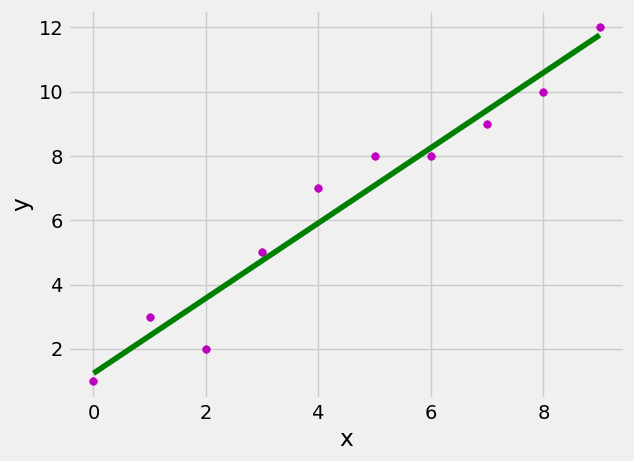

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="m", marker="o", s=30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color="g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients: \nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
    plot_regression_line(x, y, b)

main()


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header=None)

In [ ]:
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test,y_test)))

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661756


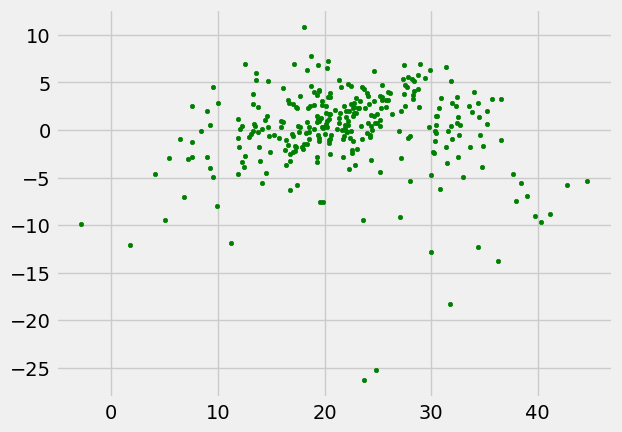

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train,color="green",s=10,label='Train dat')


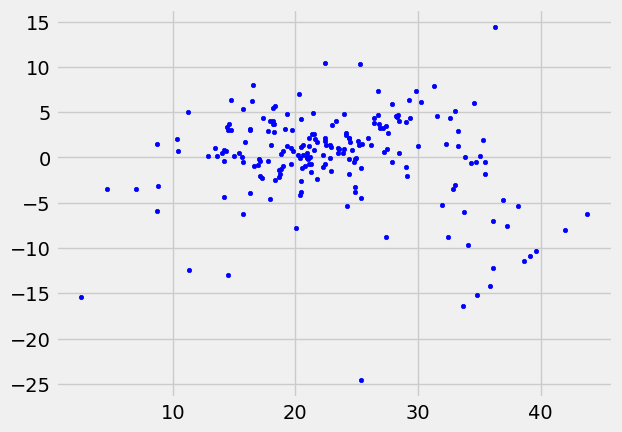

In [ ]:
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,color="blue",s=10,label='Test data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


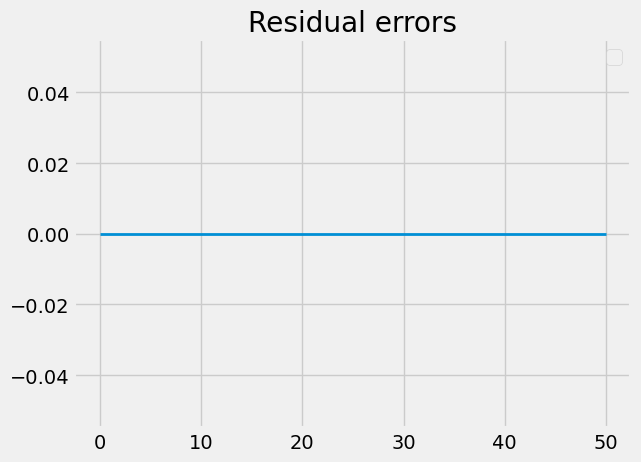

In [ ]:
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()